In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [75]:
f = lambda x: np.dot(np.array([-1, 2]), x)
df = lambda x: np.array([[-1],[2]])

# constraint Ax >= b
con_Ax = lambda x: np.dot(np.array([-4, -1]), x)
x2_Ax = lambda x1: 2 -4*x1

In [76]:
print(f(np.array([[3],[4]]))[0])
print(con_Ax(np.array([[0.5],[0]])))
print(con_Ax(np.array([[0],[0]])))
print(con_Ax(np.array([[1],[1]])))

print(x2_Ax(1))

5
[-2.]
[0]
[-5]
-2


In [80]:
def penalize_Axb(x):
    c = con_Ax(x) + 2
    return (c < 0)*(-c)

def dPenalize_Axb(x):
    c = con_Ax(x) + 2
    return (c < 0)*np.array([[4],[1]])

def penalize_pos1(x):
    return (x[0] < 0)*(-x[0])

def dPenalize_pos1(x):
    return (x[0] < 0)*np.array([[-1],[0]])

def penalize_pos2(x):
    return (x[1] < 0)*(-x[1])

def dPenalize_pos2(x):
    return (x[1] < 0)*np.array([[0],[-1]])



In [112]:
def gd(grad, v0, g=None, step_size = 0.01, Nmax = 1000, tol = 1e-6):
    '''
    grad: gradient function
    v0: initial value
    g: objective function
    '''

    if g is None:
        g = lambda v: 0
    
    losses = []
    vs = np.zeros(v0.shape)
    v = v0
    gradv = grad(v)
    
    for i in range(Nmax):
        v = v - step_size * gradv
        gradv = grad(v)
        
        loss = g(v)
        losses.append(loss)
        vs = np.hstack((vs, v))

        eps = np.linalg.norm(gradv)
        if  eps <= tol:
            print('Reach termination criteria at i={} with {:.7f}'.format(i, eps))
            break

    return v, losses, vs

In [113]:
la1 = 10
la2 = 10
la3 = 10
loss = lambda x: f(x) + la1 * penalize_Axb(x) + la2 * penalize_pos1(x) + la3 * penalize_pos2(x)
dloss = lambda x: df(x) + la1 * dPenalize_Axb(x) + la2 * dPenalize_pos1(x) + la3 * dPenalize_pos2(x)


In [121]:
xs[:,-2:]

array([[  1.90000000e-01,   2.00000000e-01],
       [  2.00000000e-02,  -2.08166817e-17]])

In [115]:
xopt.shape

(2, 1)

[[ 0.5]
 [ 0. ]]
Penalty on Ax >= b: [  1.33226763e-15]
Penalty on x1 >= 0: [-0.]
Penalty on x2 >= 0: [-0.]
[[0]
 [0]]


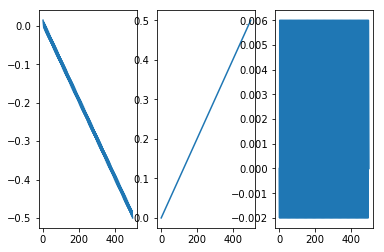

In [122]:
x0 = np.zeros((2,1))
xopt, gd_losses, xs = gd(dloss, x0, loss, step_size = 0.001, Nmax = 500)
plt.subplot(1,3,1)
plt.plot(gd_losses)
plt.subplot(1,3,2)
plt.plot(xs[0,:])
plt.subplot(1,3,3)
plt.plot(xs[1,:])


print(xopt)
print('Penalty on Ax >= b:', penalize_Axb(xopt))
print('Penalty on x1 >= 0:', penalize_pos1(xopt))
print('Penalty on x2 >= 0:', penalize_pos2(xopt))
print(dPenalize_pos2(xopt))


Using GD with penalty on linear programming problem.
Difficult and oscillation.
It may be attributed to linear nature and sudden changes from the penalty.

But, when step size is small enough, it can reach a pretty decent answer.

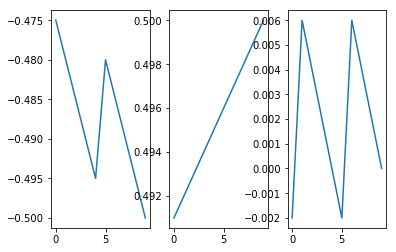

In [123]:
plt.subplot(1,3,1)
plt.plot(gd_losses[-10:])
plt.subplot(1,3,2)
plt.plot(xs[0,-10:])
plt.subplot(1,3,3)
plt.plot(xs[1,-10:])


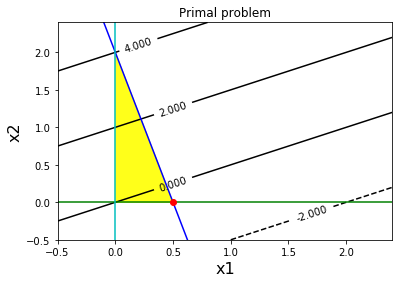

In [130]:
X = np.arange(-0.5, 2.5, 0.1)
Y = np.arange(-0.5, 2.5, 0.1)
X, Y = np.meshgrid(X, Y)
nR, nC = X.shape
Z = np.array([[f(np.array([[X[r,c]],[Y[r,c]]]))[0]
                      for c in range(nC)] for r in range(nR)])

plt.figure()
levels = np.array([-2, 0,  2, 4, 6, 7, 8, 9, 10])
CS = plt.contour(X, Y, Z, levels, colors='k')
plt.clabel(CS, inline=0.5, fontsize=10)
plt.title('Primal problem')

xminmax = np.min(X), np.max(X)
yminmax = np.min(Y), np.max(Y)

x1 = np.linspace(-1, 4, 200)
plt.plot(x1, x2_Ax(x1), 'b')
plt.plot(xminmax, (0, 0), 'g')
plt.plot((0, 0), yminmax, 'c')

# n = np.sum(g1(x) >= g2(x))
# xregion = np.hstack((x[:n],x[n::-1]))
# yregion = np.hstack((g1(x[:n]), g2(x[n::-1])))
xregion = (0, 0.5, 0)
yregion = (0, 0, x2_Ax(0))

plt.fill(xregion, yregion, color=(1, 1, 0.1)) 
# plt.plot(x[:n], g1(x[:n]), 'b', linewidth=5)
# plt.plot(x[:n], g1(x[:n]), 'c', linewidth=5)

plt.plot((0.5), (0), 'ro')

plt.xlim(xminmax)
plt.ylim(yminmax)
plt.xlabel('x1', fontsize=16)
plt.ylabel('x2', fontsize=16)
plt.show()


# Dual problem

In [165]:
# gd is for minimization problem: max f => min -f

fdual = lambda a: -2*a
eqfdual = lambda a: 2*a
deqfdual = lambda a: 2

pd1 = lambda a: -a*(a < 0)
dpd1 = lambda a: -1*(a < 0)

def pd2(a):
    c = -4*a + 1
    return (c > 0)*c

def dpd2(a):
    c = -4*a + 1
    return (c > 0)*-4

def pd3(a):
    c = -a - 2
    return (c > 0)*c

def dpd3(a):
    c = -a - 1
    return (c > 0)*(-1)    

In [168]:
la1 = 1
la2 = 1
la3 = 1
loss = lambda x: eqfdual(x) + la1 * pd1(x) + la2 * pd2(x) + la3 * pd3(x)
dloss = lambda x: deqfdual(x) + la1 * dpd1(x) + la2 * dpd2(x) + la3 * dpd3(x)


0.252
Penalty on a >= 0: -0.0 ; a: 0.252
Penalty on -4*a <= -1: -0.0 ; -4*a: -1.008
Penalty on -a <= 2: -0.0 ; -a: -0.252


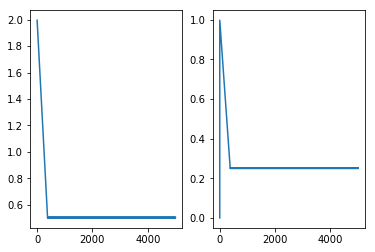

In [169]:
x0 = np.array(1)

xopt, gd_losses, xs = gd(dloss, x0, loss, step_size = 0.001, Nmax = 5000)
plt.subplot(1,2,1)
plt.plot(gd_losses)
plt.subplot(1,2,2)
plt.plot(xs)

print(xopt)
print('Penalty on a >= 0:', pd1(xopt), '; a:', xopt)
print('Penalty on -4*a <= -1:', pd2(xopt), '; -4*a:', -4*xopt)
print('Penalty on -a <= 2:', pd3(xopt), '; -a:', -xopt)


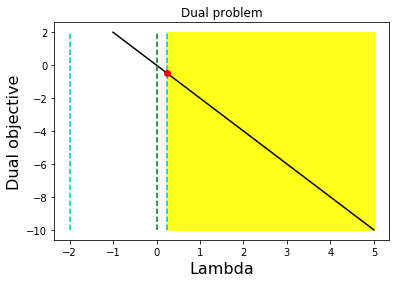

In [174]:
a = np.linspace(-1, 5, 50)

yminmax= np.min(fdual(a)), np.max(fdual(a))

xregion = (1/4, 5, 5, 1/4)
yregion = (yminmax[1], yminmax[1], yminmax[0], yminmax[0])
plt.fill(xregion, yregion, color=(1, 1, 0.1)) 

plt.plot(a, fdual(a), 'k')
plt.title('Dual problem')
plt.xlabel('Lambda', fontsize=16)
plt.ylabel('Dual objective', fontsize=16)

plt.plot((0, 0), yminmax, 'g--')
plt.plot((1/4, 1/4), yminmax, 'c--')
plt.plot((-2, -2), yminmax, 'c--')

plt.plot((xopt), fdual(xopt), 'ro')


In [175]:
np.array([-1, 2]) - np.array([-4, -1]) * 0.25

array([ 0.  ,  2.25])

# Question

In [176]:
f = lambda x: np.dot(np.array([2, 2]), x)
df = lambda x: np.array([[-1],[2]])

# constraint Ax >= b
con_Ax = lambda x: np.dot(np.array([-4, -1]), x)
x2_Ax = lambda x1: 2 -4*x1

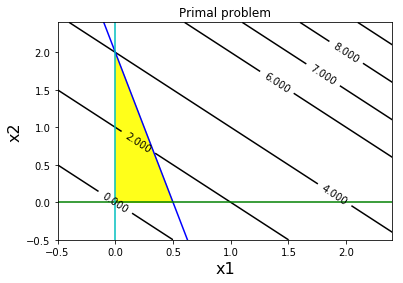

In [177]:
X = np.arange(-0.5, 2.5, 0.1)
Y = np.arange(-0.5, 2.5, 0.1)
X, Y = np.meshgrid(X, Y)
nR, nC = X.shape
Z = np.array([[f(np.array([[X[r,c]],[Y[r,c]]]))[0]
                      for c in range(nC)] for r in range(nR)])

plt.figure()
levels = np.array([-2, 0,  2, 4, 6, 7, 8, 9, 10])
CS = plt.contour(X, Y, Z, levels, colors='k')
plt.clabel(CS, inline=0.5, fontsize=10)
plt.title('Primal problem')

xminmax = np.min(X), np.max(X)
yminmax = np.min(Y), np.max(Y)

x1 = np.linspace(-1, 4, 200)
plt.plot(x1, x2_Ax(x1), 'b')
plt.plot(xminmax, (0, 0), 'g')
plt.plot((0, 0), yminmax, 'c')

# n = np.sum(g1(x) >= g2(x))
# xregion = np.hstack((x[:n],x[n::-1]))
# yregion = np.hstack((g1(x[:n]), g2(x[n::-1])))
xregion = (0, 0.5, 0)
yregion = (0, 0, x2_Ax(0))

plt.fill(xregion, yregion, color=(1, 1, 0.1)) 
# plt.plot(x[:n], g1(x[:n]), 'b', linewidth=5)
# plt.plot(x[:n], g1(x[:n]), 'c', linewidth=5)

# plt.plot((0.5), (0), 'ro')

plt.xlim(xminmax)
plt.ylim(yminmax)
plt.xlabel('x1', fontsize=16)
plt.ylabel('x2', fontsize=16)
plt.show()
